In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta a la carpeta con resultados
results_dir = "results_vm_ubuntu"

# Cargar todos los archivos JSON de resultados
data = {}
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        with open(os.path.join(results_dir, filename)) as f:
            data[filename] = json.load(f)

# Mostrar los archivos cargados
print(f"Archivos cargados: {list(data.keys())}")


Archivos cargados: ['results_vm_20250523_230129.json', 'results_vm_20250523_230208.json', 'results_vm_20250523_230318.json', 'results_vm_20250523_230356.json', 'results_vm_20250523_230435.json', 'results_vm_20250523_230534.json', 'results_vm_20250523_230624.json', 'results_vm_20250523_230712.json', 'results_vm_20250523_230809.json', 'results_vm_20250523_230858.json', 'results_vm_20250523_230946.json', 'results_vm_20250523_231038.json', 'results_vm_20250523_231131.json', 'results_vm_20250523_231224.json', 'results_vm_20250523_231314.json', 'results_vm_20250523_231405.json', 'results_vm_20250523_231459.json', 'results_vm_20250523_231552.json', 'results_vm_20250523_231704.json', 'results_vm_20250523_231753.json']


In [2]:
# Convertir los resultados a un DataFrame
rows = []
for file, tests in data.items():
    source = "docker" if "docker" in file.lower() else "vm"
    for test_name, result in tests.items():
        if "error" not in result:
            rows.append({
                "source": source,
                "file": file,
                "test": test_name,
                "cpu": result["cpu"],
                "memory": result["memory"],
                "time": result["time"]
            })

df = pd.DataFrame(rows)
df.head()


,source,file,test,cpu,memory,time
0,vm,results_vm_20250523_230129.json,idle,21.6,0.085938,5.001215
1,vm,results_vm_20250523_230129.json,cpu_stress,34.3,9.980469,5.034950
2,vm,results_vm_20250523_230129.json,cpu_multi,13.2,11.843750,11.309268
3,vm,results_vm_20250523_230129.json,memory_stress,100.0,1119.105469,5.926288
4,vm,results_vm_20250523_230129.json,memory_large,9.7,86.910156,4.007315


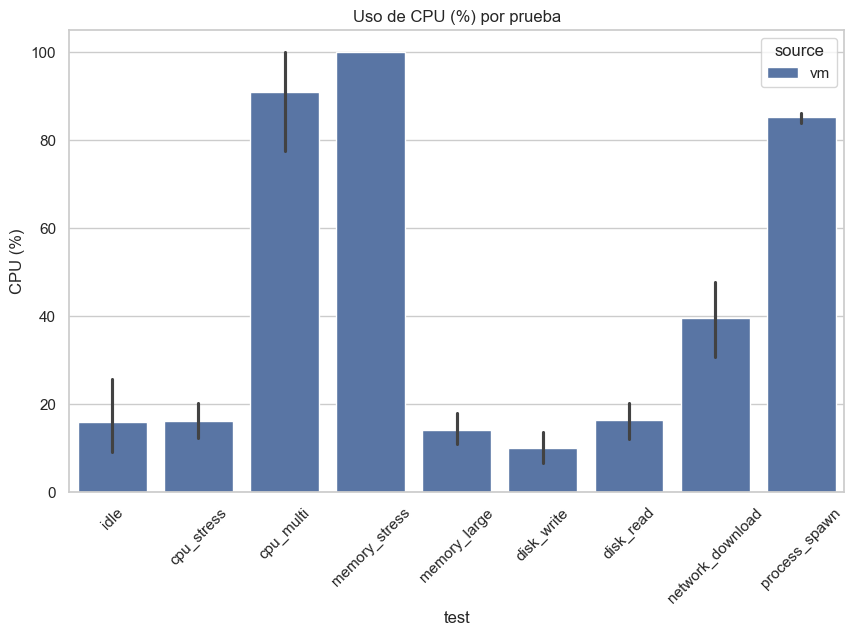

In [3]:
plt.figure()
sns.barplot(data=df, x="test", y="cpu", hue="source")
plt.title("Uso de CPU (%) por prueba")
plt.xticks(rotation=45)
plt.ylabel("CPU (%)")
plt.show()


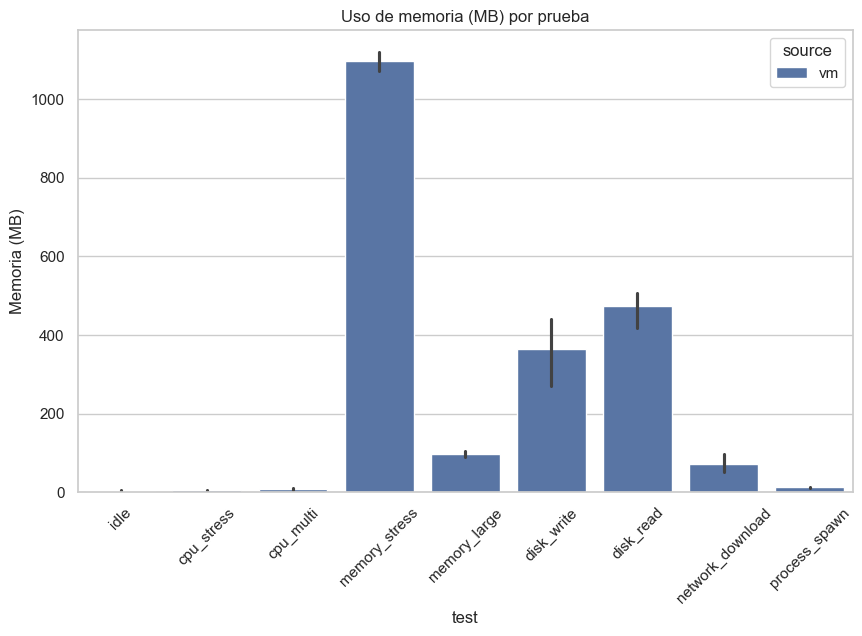

In [4]:
plt.figure()
sns.barplot(data=df, x="test", y="memory", hue="source")
plt.title("Uso de memoria (MB) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Memoria (MB)")
plt.show()


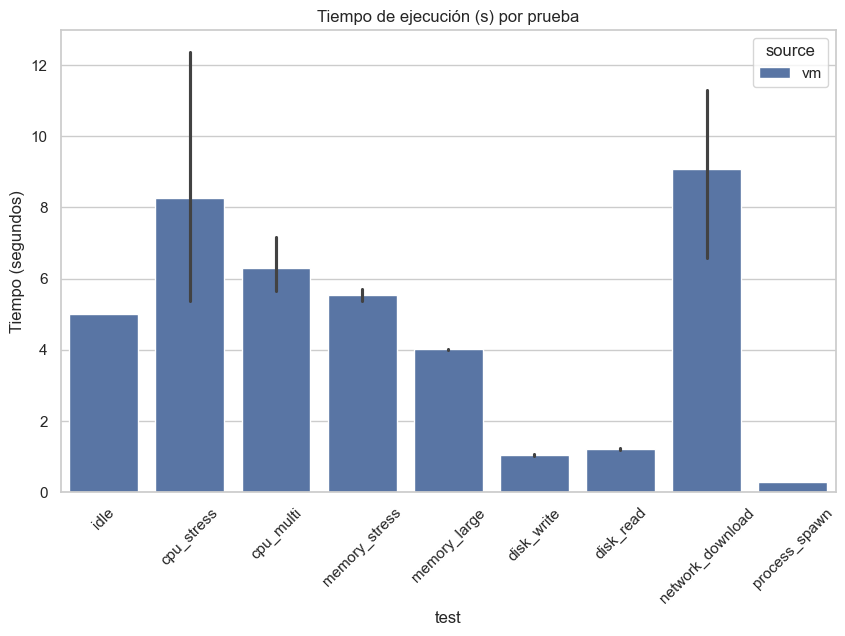

In [5]:
plt.figure()
sns.barplot(data=df, x="test", y="time", hue="source")
plt.title("Tiempo de ejecución (s) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Tiempo (segundos)")
plt.show()


In [6]:
summary = df.groupby(["source", "test"]).agg(
    cpu_mean=("cpu", "mean"),
    cpu_std=("cpu", "std"),
    memory_mean=("memory", "mean"),
    memory_std=("memory", "std"),
    time_mean=("time", "mean"),
    time_std=("time", "std")
).reset_index()

summary


,source,test,cpu_mean,cpu_std,memory_mean,memory_std,time_mean,time_std
0,vm,cpu_multi,90.905,28.026181,8.473633,4.860590,6.293975,1.752872
1,vm,cpu_stress,16.270,9.465010,4.691992,2.436421,8.275138,8.130347
2,vm,disk_read,16.355,9.491075,473.123047,114.408884,1.216313,0.042264
3,vm,disk_write,10.145,8.028336,363.344141,187.845907,1.037169,0.087195
4,vm,idle,15.885,21.377984,3.812695,4.594637,5.002799,0.003555
5,vm,memory_large,14.165,8.038806,96.936328,19.212607,4.008969,0.007592
6,vm,memory_stress,100.000,0.000000,1095.681445,55.979743,5.534055,0.392402
7,vm,network_download,39.695,20.403366,72.254492,53.711880,9.074741,5.388805
8,vm,process_spawn,85.200,2.932576,11.995508,2.447024,0.292979,0.013179
